# <u>Drought Prediction</u>: Exploratory Data Analysis

INSERT INTRODUCTION AND CONTEXT

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

MORE TEXT

In [2]:
# Local location of the data
# local_data = 'D:\\Data_Science\\DroughtProject\\Data\\' # Location on Windows
local_data = '/home/chad/Data/Drought_Prediction/' # Location on Linux

# Load the training set and the soil variables.
soil_set = pd.read_csv(local_data + 'soil_data.csv')
train_set = pd.read_csv(local_data + 'train_timeseries.csv')

In [3]:
# Convert date column from object to datetime for training set.
train_set['date'] = pd.to_datetime(train_set['date'])

In [4]:
soil_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fips           3109 non-null   int64  
 1   lat            3109 non-null   float64
 2   lon            3109 non-null   float64
 3   elevation      3109 non-null   int64  
 4   slope1         3109 non-null   float64
 5   slope2         3109 non-null   float64
 6   slope3         3109 non-null   float64
 7   slope4         3109 non-null   float64
 8   slope5         3109 non-null   float64
 9   slope6         3109 non-null   float64
 10  slope7         3109 non-null   float64
 11  slope8         3109 non-null   float64
 12  aspectN        3109 non-null   float64
 13  aspectE        3109 non-null   float64
 14  aspectS        3109 non-null   float64
 15  aspectW        3109 non-null   float64
 16  aspectUnknown  3109 non-null   float64
 17  WAT_LAND       3109 non-null   float64
 18  NVG_LAND

In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300680 entries, 0 to 19300679
Data columns (total 21 columns):
 #   Column       Dtype         
---  ------       -----         
 0   fips         int64         
 1   date         datetime64[ns]
 2   PRECTOT      float64       
 3   PS           float64       
 4   QV2M         float64       
 5   T2M          float64       
 6   T2MDEW       float64       
 7   T2MWET       float64       
 8   T2M_MAX      float64       
 9   T2M_MIN      float64       
 10  T2M_RANGE    float64       
 11  TS           float64       
 12  WS10M        float64       
 13  WS10M_MAX    float64       
 14  WS10M_MIN    float64       
 15  WS10M_RANGE  float64       
 16  WS50M        float64       
 17  WS50M_MAX    float64       
 18  WS50M_MIN    float64       
 19  WS50M_RANGE  float64       
 20  score        float64       
dtypes: datetime64[ns](1), float64(19), int64(1)
memory usage: 3.0 GB


In [6]:
soil_set.head()

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1005,31.870670,-85.405456,146,0.0158,0.1868,0.5441,0.2424,0.0106,0.0003,...,72.578804,1.828159,74.406960,3,2,1,1,1,1,1
2,1003,30.659218,-87.746067,52,0.0746,0.4370,0.4415,0.0469,0.0000,0.0000,...,59.843639,2.996914,62.840553,3,2,1,2,1,1,1
3,1007,33.015893,-87.127148,93,0.0144,0.1617,0.3714,0.3493,0.0898,0.0134,...,1.916593,0.008330,1.924924,3,2,1,1,1,1,1
4,1009,33.977448,-86.567246,198,0.0050,0.0872,0.2799,0.3576,0.1477,0.1037,...,1.891909,0.027488,1.919397,3,2,1,1,1,1,1


In [7]:
train_set.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


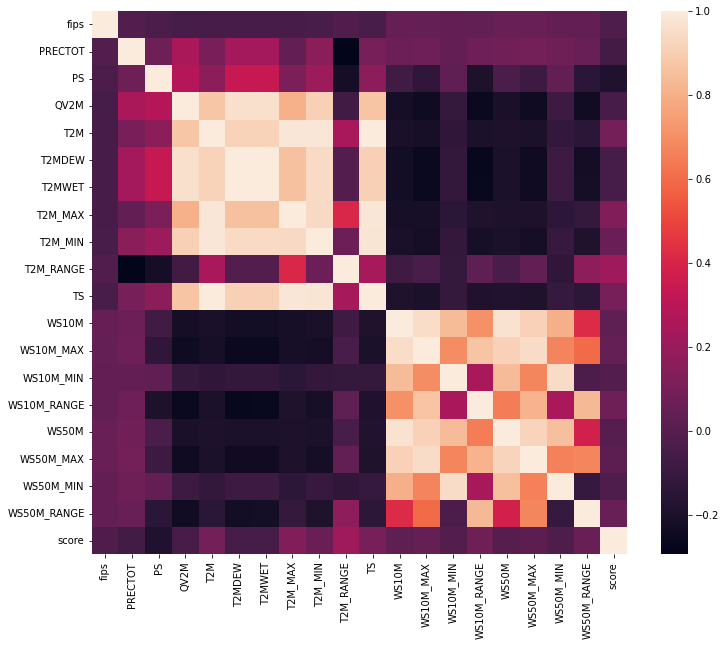

In [8]:
# Heatmap of correlation matrix
plt.subplots(figsize=(12,10))
sns.heatmap(train_set.corr());

MORE TEXT

<AxesSubplot:xlabel='Date', ylabel='Earth Skin Temperature (C)'>

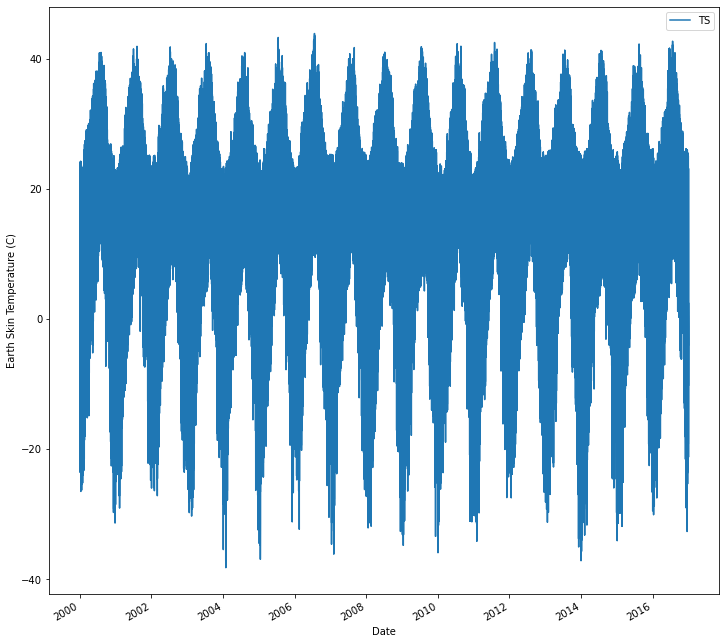

In [11]:
train_set.plot(x='date', y='TS', ylabel='Earth Skin Temperature (C)', xlabel='Date', figsize=(12,12))

In [10]:
train_set.TS.describe()

count    1.930068e+07
mean     1.288900e+01
std      1.114961e+01
min     -3.823000e+01
25%      4.340000e+00
50%      1.404000e+01
75%      2.207000e+01
max      4.385000e+01
Name: TS, dtype: float64

#### The TS (Earth Skin Temperature) is in Celsius.